In [1]:
import scanpy as sc
import scvi
from matplotlib import rcParams
import matplotlib.pyplot as plt

folder_path = "C:/Users/heung/OneDrive/Documents/scData/16. Siglec-9_GSE235913/sc2/"

# Load data

In [2]:
# Read in the data
adata = sc.read(folder_path + 'adata_annotated.h5ad')
# model = scvi.model.SCVI.load(folder_path + "model/", adata)

In [3]:
# del adata.layers['scvi_normalized']

In [5]:
# get the latent space
adata.obsm['X_scVI'] = model.get_latent_representation()
# model.get_latent_representation().shape
# 7.3GB (크게 차이 없음)

# get scVI normalized data
adata.layers['scvi_normalized'] = model.get_normalized_expression(library_size = 1e4) # <- 용량 큼 (~30GB)

# running time: 5m 25s for 94 samples

In [ ]:
adata.obs.head(3)

In [ ]:
df1 = adata.obs
df1['sample_temp'] = df1['sample'].apply(lambda x: x[:-2] if x.endswith('v2') else x)
df1

In [107]:
import pandas as pd
df_excel = pd.read_excel(folder_path + "43018_2022_475_MOESM2_ESM.xlsx", sheet_name = 'Table 1', header = 0)
# df_excel.head(3)
df_excel = df_excel.drop(columns = ['Diagnosis', 'Age', 'IDH', 'snRNA-seq', 'snATAC-seq', 'RNA-exome', 'Spatial RNA', 'Spatial protein'])
df_excel.head(3)

,ID,Stage,Pair#,Sex,Tumor site,Elapsed time to recurrence,Overall survival,event
0,SF10022,Primary,1,M,R-TEMPORAL,NaN,496,1.0
1,SF10484,Recurrent,1,M,TEMPORAL,419.0,496,1.0
2,SF10099,Primary,2,M,L-TEMPORAL,NaN,462,1.0


In [108]:
# 엑셀 파일을 딕셔너리로 변환
id_to_age = df_excel.set_index('ID')['Stage'].to_dict()
id_to_pair = df_excel.set_index('ID')['Pair#'].to_dict()
id_to_gender = df_excel.set_index('ID')['Sex'].to_dict()
id_to_tumor_site = df_excel.set_index('ID')['Tumor site'].to_dict()
id_to_elapsed_time = df_excel.set_index('ID')['Elapsed time to recurrence'].to_dict()
id_to_overall_survival = df_excel.set_index('ID')['Overall survival'].to_dict()
id_to_event = df_excel.set_index('ID')['event'].to_dict()

In [109]:
adata.obs['stage'] = adata.obs['sample_temp'].map(id_to_age)
adata.obs['pair'] = adata.obs['sample_temp'].map(id_to_pair)
adata.obs['sex'] = adata.obs['sample_temp'].map(id_to_gender)
adata.obs['tumor_site'] = adata.obs['sample_temp'].map(id_to_tumor_site)
adata.obs['elapsed_time'] = adata.obs['sample_temp'].map(id_to_elapsed_time)
adata.obs['overall_survival'] = adata.obs['sample_temp'].map(id_to_overall_survival)
adata.obs['event'] = adata.obs['sample_temp'].map(id_to_event)

del id_to_age, id_to_pair, id_to_gender, id_to_tumor_site, id_to_elapsed_time, id_to_overall_survival, id_to_event

In [110]:
adata.obs = adata.obs.drop(columns = ['pair'])
adata.obs.head(3)

,sample,n_genes,total_counts,pct_counts_mito,pct_counts_ribo,_scvi_batch,_scvi_labels,leiden,cnv_score,cell_type,stage,sex,tumor_site,elapsed_time,overall_survival,sample_temp,event
AAACCCACAGAGTGAC-1,SF10099,1258,2454.0,0.285249,0.529747,0,0,1,0.014965,Oligodendrocytes,Primary,M,L-TEMPORAL,NaN,462,SF10099,1.0
AAAGGATCAATCGCCG-1,SF10099,1968,3911.0,0.000000,0.332396,0,0,1,0.014965,Oligodendrocytes,Primary,M,L-TEMPORAL,NaN,462,SF10099,1.0
AAAGGTAAGGATAATC-1,SF10099,2260,4602.0,0.239027,0.173837,0,0,14,0.017120,Malignant cells,Primary,M,L-TEMPORAL,NaN,462,SF10099,1.0


In [111]:
adata.obs['overall_survival'].unique()

array([462, nan, 1057, 350, 998, 662, 564, 343, 316, 287, 567, 313, 546,
       1473, 392, 496, 812, 688, 1063, 167, 470, 625, 560, 2147, 624],
      dtype=object)

In [112]:
adata.obs.groupby('overall_survival')['sample'].nunique()


overall_survival
167     1
287     2
313     2
316     2
343     2
350     2
392     2
462     2
470     1
496     1
546     2
560     1
564     1
567     2
624     1
625     3
662     2
688     2
812     1
998     2
1057    2
1063    1
1473    1
2147    1
Name: sample, dtype: int64

In [ ]:
adata

In [8]:
adata.write_h5ad(folder_path + 'adata_annotated.h5ad')

---

In [3]:
adata.obs.head(3)

,sample,n_genes,total_counts,pct_counts_mito,pct_counts_ribo,_scvi_batch,_scvi_labels,leiden,cnv_score,cell_type,stage,sex,tumor_site,elapsed_time,overall_survival
AAACCCACAGAGTGAC-1,SF10099,1258,2454.0,0.285249,0.529747,0,0,1,0.014965,Oligodendrocytes,Primary,M,L-TEMPORAL,NaN,462.0
AAAGGATCAATCGCCG-1,SF10099,1968,3911.0,0.000000,0.332396,0,0,1,0.014965,Oligodendrocytes,Primary,M,L-TEMPORAL,NaN,462.0
AAAGGTAAGGATAATC-1,SF10099,2260,4602.0,0.239027,0.173837,0,0,14,0.017120,Malignant cells,Primary,M,L-TEMPORAL,NaN,462.0


# UMAP

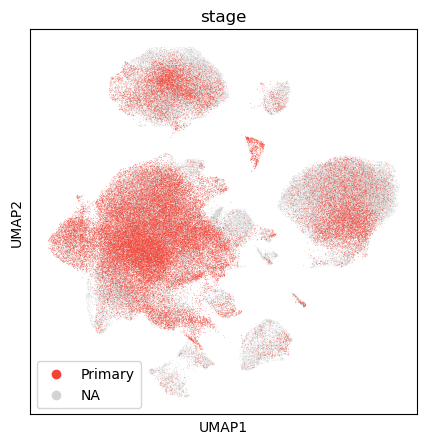

In [18]:
rcParams['figure.figsize'] = (5, 5)
sc.pl.umap(
    adata,
    color = ['stage'],
    # add_outline = True,
    # frameon = False,
    # legend_loc = 'lower left',
    # legend_fontsize = 9,
    # legend_fontoutline = 1.5,
    groups = ['Primary'],
    palette = ['#f44336'],
    show = False
)

plt.legend(loc = 'lower left')
plt.show()

In [ ]:
rcParams['figure.figsize'] = (5, 5)
sc.pl.umap(
    adata,
    color = ['stage'],
    # add_outline = True,
    # frameon = False,
    # legend_loc = 'on data',
    # legend_fontsize = 9,
    # legend_fontoutline = 1.5,
    groups = ['Recurrent'],
    palette = ['#2196f3'],
    show = False
)

plt.legend(loc = 'lower left')
plt.show()

---

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


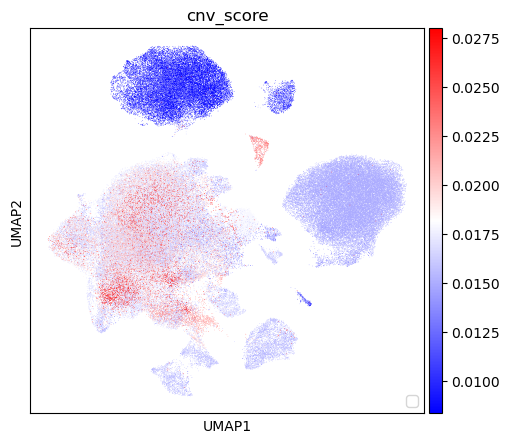

In [20]:
# rcParams['figure.figsize'] = (5, 5)
rcParams['figure.figsize'] = (5.6, 5)
sc.pl.umap(
    adata,
    color = ['cnv_score'],
    # add_outline = True,
    # frameon = False,
    # legend_loc = 'on data',
    # legend_fontsize = 9,
    # legend_fontoutline = 1.5,
    color_map = 'bwr',
    show = False,
)
plt.legend(loc = 'lower right')


plt.show()

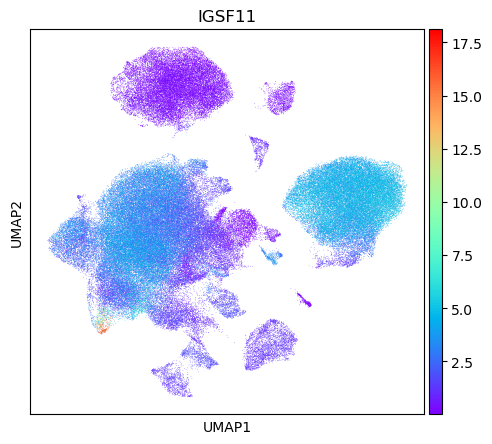

In [24]:
rcParams['figure.figsize'] = (5.6, 5)
sc.pl.umap(
    adata,
    color = ['IGSF11'],
    color_map = 'rainbow',
    layer = 'scvi_normalized'
    
)

plt.show()

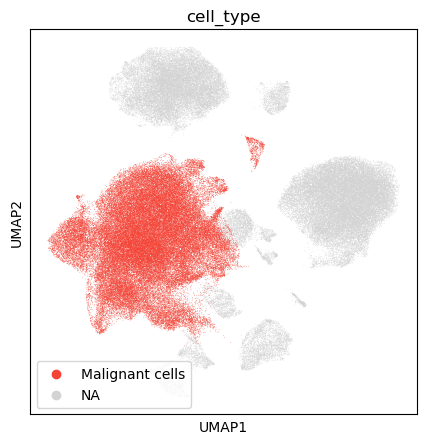

In [22]:
# rcParams['figure.figsize'] = (5.6, 5)
rcParams['figure.figsize'] = (5, 5)
sc.pl.umap(
    adata,
    color = ['cell_type'],
    # color_map = 'bwr',
    groups = ['Malignant cells'],
    show = False
)

plt.legend(loc = 'lower left')
plt.show()

---
# Violin Plot

In [28]:
adata_filtered = adata[adata.obs['cell_type'].isin(['Microglia', 'T cells'])]

c:\Users\heung\anaconda3\Lib\site-packages\scanpy\plotting\_anndata.py:907: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
c:\Users\heung\anaconda3\Lib\site-packages\scanpy\plotting\_anndata.py:907: UserWarning: 
The palette list has fewer values (2) than needed (9) and will cycle, which may produce an uninterpretable plot.
  ax = sns.violinplot(


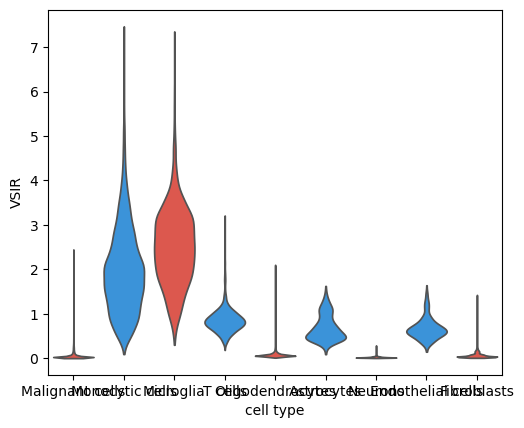

In [45]:
sc.pl.violin(
    adata,
    keys = ['VSIR'],
    groupby = 'cell_type',
    stripplot = False,
    use_raw = False,
    layer = 'scvi_normalized',
    palette = ['#f44336', '#2196f3'],
    # order = ['Primary', 'Recurrent'],
    
)

c:\Users\heung\anaconda3\Lib\site-packages\scanpy\plotting\_anndata.py:907: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(


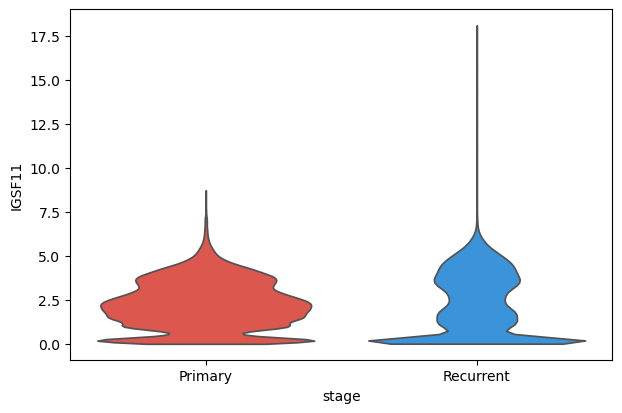

In [7]:
sc.pl.violin(
    adata,
    # keys = ['VSIR'],
    keys = ['IGSF11'],
    groupby = 'stage',
    stripplot = False,
    use_raw = False,
    layer = 'scvi_normalized',
    palette = ['#f44336', '#2196f3'],
    # order = ['Primary', 'Recurrent'],
)

c:\Users\heung\anaconda3\Lib\site-packages\scanpy\plotting\_anndata.py:907: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(


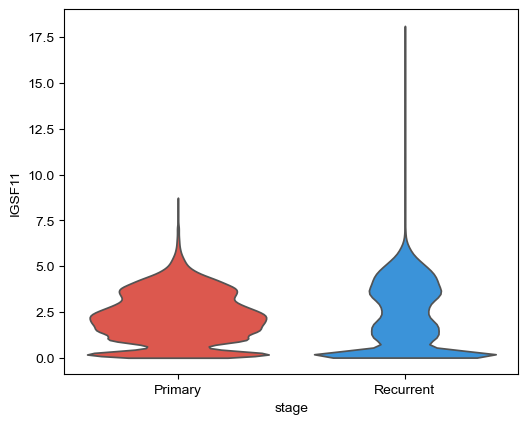

In [47]:
sc.pl.violin(
    adata,
    keys = ['IGSF11'],
    groupby = 'stage',
    stripplot = False,
    use_raw = False,
    layer = 'scvi_normalized',
    palette = ['#f44336', '#2196f3'],
    order = ['Primary', 'Recurrent'],
)

In [58]:
adata.uns['cell_type_colors'] = ['#f44336', '#9c27b0', '#3f51b5', '#2196f3', '#009688', '#8bc34a', '#ffc107', '#ff9800', '#795548']

In [59]:
adata.uns['cell_type_colors']

['#f44336',
 '#9c27b0',
 '#3f51b5',
 '#2196f3',
 '#009688',
 '#8bc34a',
 '#ffc107',
 '#ff9800',
 '#795548']

In [8]:
fig, ax = plt.subplots(figsize = (8, 4))
gene = 'IGSF11'

sc.pl.violin(
    adata,
    keys = gene,
    groupby = 'cell_type',
    stripplot = False,
    # jitter = 0.4,
    # size = 0.3,
    layer = 'scvi_normalized', use_raw = False,
    ax = ax,
    show = False,
    color = adata.uns['cell_type_colors'].
    
)

plt.rcParams['font.family'] = 'Arial'
plt.xticks(rotation = 45, rotation_mode = 'anchor', ha = 'right', fontsize = 12)   # x 축 레이블 회전
plt.yticks(fontsize = 12)
plt.title(gene, fontweight = 'bold', fontsize = 15)
# plt.ylabel('VSIR', fontsize = 12, fontweight = 'bold')
plt.xlabel('')
plt.ylabel('')

plt.show()

SyntaxError: invalid syntax (3343752149.py, line 15)

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
adata_filtered = adata[adata.obs['cell_type'].isin(['Malignant cells', 'Oligodendrocytes'])]

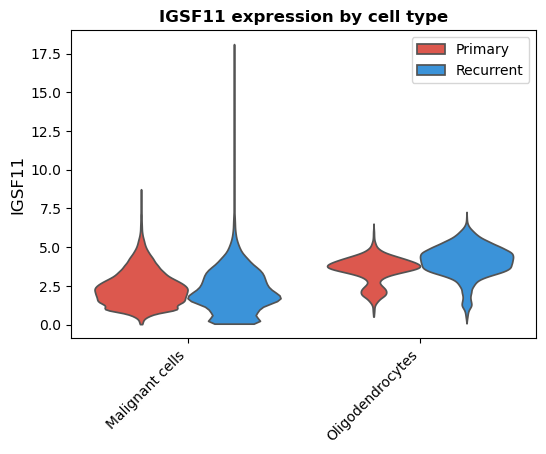

In [15]:
gene_name = 'IGSF11'

# scvi_normalized에서 gene expression data 추출
if gene_name in adata_filtered.var_names:
    gene_idx = adata_filtered.var_names.get_loc(gene_name)
    gene_expression = adata_filtered.layers['scvi_normalized'][:, gene_idx]

df = pd.DataFrame({
    'cell_type': adata_filtered.obs['cell_type'],
    'hue': adata_filtered.obs['stage'],
    gene_name: gene_expression
})

# df = df[df['hue'].isin(['Res', 'Non-res'])]
# df['hue'] = df['hue'].cat.remove_unused_categories()

# 바이올린 플롯 그리기
plt.figure(figsize=(6, 4))
sns.violinplot(
    data = df,
    x = 'cell_type',
    y = gene_name,
    hue = 'hue',
    split = False,
    inner = None,
    cut = 0,
    density_norm = 'width',
    palette = ['#f44336', '#2196f3'],
)

# 그래프 꾸미기
plt.title(f'{gene_name} expression by cell type', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.legend(title = None)
plt.xlabel('')
plt.ylabel(gene_name, fontsize=12)
plt.show()


---
# Box plot

C:\Users\heung\AppData\Local\Temp\ipykernel_51160\3309159651.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


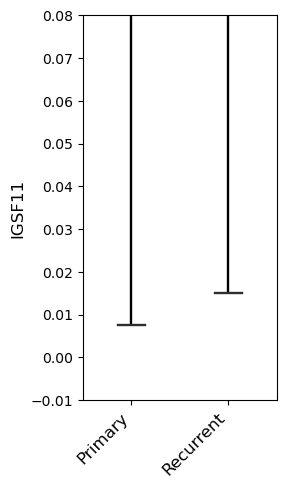

In [12]:
gene_name = 'IGSF11'

# scvi_normalized에서 gene expression data 추출
if gene_name in adata.var_names:
    gene_idx = adata.var_names.get_loc(gene_name)
    gene_expression = adata.layers['scvi_normalized'][:, gene_idx]

df = pd.DataFrame({
    'cell_type': adata.obs['cell_type'],
    'hue': adata.obs['stage'],
    gene_name: gene_expression
})

# df = df[df['hue'].isin(['Res', 'Non-res'])]
# df['hue'] = df['hue'].cat.remove_unused_categories()

# 바이올린 플롯 그리기
plt.figure(figsize=(2.5, 5))
sns.boxplot(
    data = df,
    x = 'hue',
    y = gene_name,
    # hue = 'hue',
    linewidth = 1.7,
    flierprops = dict(marker = 'o', markersize = 0),
    palette = ['#ff9800', '#009688'],
    boxprops = dict(edgecolor = 'k'), medianprops = dict(color = 'k'), whiskerprops = dict(color = 'k'),
    gap = 0.3
)

# 그래프 꾸미기
# plt.title(f'{gene_name} expression by cell type', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize = 12)
# plt.legend(title = None, loc = 'upper left')
plt.xlabel('')
plt.ylabel(gene_name, fontsize=12)
# plt.ylim(-1, 7) # SELPLG, VSIR
plt.ylim(-0.01, 0.08) # IGSF11

plt.show()


In [ ]:
adata

---
# Bar graph

In [ ]:
adata.uns['cell_type_colors']

C:\Users\heung\AppData\Local\Temp\ipykernel_51160\445747624.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_df = df.groupby(['hue', 'cell_type']).size().unstack(fill_value=0)


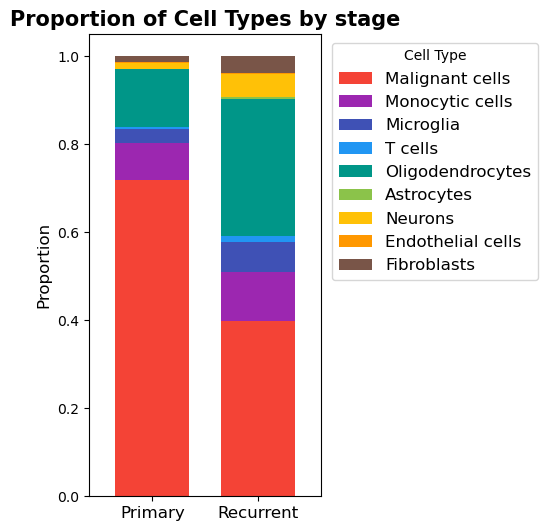

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 예시 데이터프레임 생성
df = pd.DataFrame({
    'cell_type': adata.obs['cell_type'],
    'hue': adata.obs['stage'],
})

# df = df[df['hue'].isin(['Res', 'Non-res'])]
# df['hue'] = df['hue'].cat.remove_unused_categories()

# 데이터프레임을 'cell_type'과 'hue'로 그룹화하여 비율 계산
count_df = df.groupby(['hue', 'cell_type']).size().unstack(fill_value=0)

# 각 hue 그룹의 총합을 구하고 비율 계산
proportions_df = count_df.div(count_df.sum(axis=1), axis=0)
hue_order = ['Primary', 'Recurrent']



# 스택된 막대 그래프 그리기
proportions_df.loc[hue_order].plot(
    kind='bar',
    stacked=True,
    figsize=(3, 6),
    color = adata.uns['cell_type_colors'],
    width = 0.7
)

# 그래프 꾸미기
plt.title('Proportion of Cell Types by stage', fontsize=15, fontweight='bold')
plt.xticks(rotation=0, fontsize = 12)
plt.xlabel('')
plt.ylabel('Proportion', fontsize = 12)
plt.legend(title='Cell Type', loc = 'upper left', bbox_to_anchor = (1.01, 1), fontsize = 12)
plt.show()


---
# Survival graph

In [133]:
cell_type = 'Microglia'
adata_filtered = adata[adata.obs['cell_type'] == cell_type]
adata_filtered = adata_filtered[~adata_filtered.obs['event'].isna()]

In [134]:
import numpy as np
gene = 'VSIR'

# 발현량의 중앙값을 기준으로 설정
threshold = np.median(adata_filtered.layers['scvi_normalized'][:, adata_filtered.var_names == gene])

In [135]:
adata_filtered.obs['gene_group'] = adata_filtered.layers['scvi_normalized'][:, adata_filtered.var_names == gene] > threshold
adata_filtered.obs.head(3)

C:\Users\heung\AppData\Local\Temp\ipykernel_50960\882640816.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_filtered.obs['gene_group'] = adata_filtered.layers['scvi_normalized'][:, adata_filtered.var_names == gene] > threshold


,sample,n_genes,total_counts,pct_counts_mito,pct_counts_ribo,_scvi_batch,_scvi_labels,leiden,cnv_score,cell_type,stage,sex,tumor_site,elapsed_time,overall_survival,sample_temp,event,gene_group
ACGGGTCTCGACCAAT-1,SF10099,1812,3476.0,0.604143,1.495972,0,0,0,0.008347,Microglia,Primary,M,L-TEMPORAL,NaN,462,SF10099,1.0,False
ACTTCCGTCCGATAGT-1,SF10099,2842,6616.0,0.075574,0.075574,0,0,0,0.008347,Microglia,Primary,M,L-TEMPORAL,NaN,462,SF10099,1.0,False
AGAAGTATCGCTTGCT-1,SF10099,1629,3044.0,0.229961,0.295664,0,0,0,0.018286,Microglia,Primary,M,L-TEMPORAL,NaN,462,SF10099,1.0,True


In [136]:
adata_filtered.shape

(8029, 29566)

c:\Users\heung\anaconda3\Lib\site-packages\scanpy\plotting\_anndata.py:907: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(


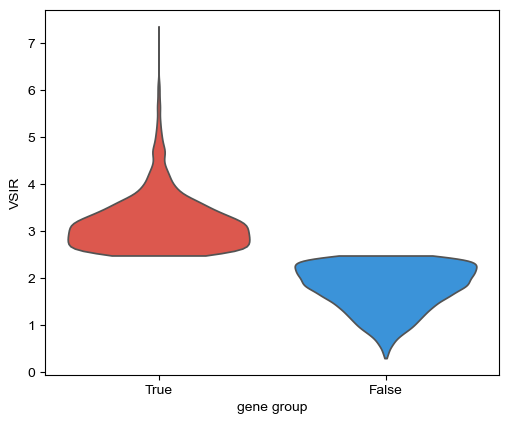

In [137]:
sc.pl.violin(
    adata_filtered,
    keys = ['VSIR'],
    groupby = 'gene_group',
    stripplot = False,
    use_raw = False,
    layer = 'scvi_normalized',
    palette = ['#f44336', '#2196f3'],
    order = [True, False],
)

In [138]:
# 중복되지 않은 샘플을 필터링합니다.
unique_samples = adata_filtered.obs['sample'].drop_duplicates()

# 필터링된 데이터를 만듭니다.
adata_filtered = adata_filtered[adata_filtered.obs.index.isin(unique_samples.index)]

# 결과 확인
print(f"Original data shape: {adata_filtered.shape}")


Original data shape: (64, 29566)


In [139]:
adata_filtered.obs

,sample,n_genes,total_counts,pct_counts_mito,pct_counts_ribo,_scvi_batch,_scvi_labels,leiden,cnv_score,cell_type,stage,sex,tumor_site,elapsed_time,overall_survival,sample_temp,event,gene_group
ACGGGTCTCGACCAAT-1,SF10099,1812,3476.0,0.604143,1.495972,0,0,0,0.008347,Microglia,Primary,M,L-TEMPORAL,NaN,462,SF10099,1.0,False
AACAAAGTCCTCTTTC-1,SF10432,182,203.0,0.000000,0.492611,1,0,0,0.008347,Microglia,Primary,F,PARIETAL,NaN,NaN,SF10432,0.0,True
AATGACCCAGCTGAAG-1,SF10857,1235,1914.0,2.821316,0.365726,2,0,7,0.008347,Microglia,Primary,M,TEMPORAL,NaN,1057,SF10857,1.0,False
ATTCCATGTCTTAGTG-1,SF11082,1875,3070.0,0.065147,0.325733,3,0,23,0.008347,Microglia,Primary,F,R-TEMPORAL,NaN,350,SF11082,1.0,True
AAACCCAGTTAAGAAC-1,SF11344,1460,2299.0,0.043497,0.130492,4,0,0,0.008347,Microglia,Primary,F,L-FRONTAL,NaN,998,SF11344,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AACCTGAGTGAACTAA,SF9715v2,765,1141.0,0.000000,0.087642,64,0,0,0.008347,Microglia,Recurrent,M,R-PARIETAL,NaN,567,SF9715,1.0,False
AAAGAACTCGCCAGTG,SF12594,1593,2944.0,0.679348,0.849185,65,0,0,0.008347,Microglia,Recurrent,M,OTHER,NaN,NaN,SF12594,0.0,True
AACCCAAGTGTCCACG,SF12774,973,1374.0,0.218341,0.218341,66,0,7,0.008347,Microglia,Recurrent,M,OTHER,NaN,NaN,SF12774,0.0,True
ACTTCCGAGACTTAAG,SF9791,2216,3747.0,0.160128,1.387777,67,0,23,0.008347,Microglia,Recurrent,M,OCCIPITAL,NaN,NaN,SF9791,0.0,False


In [142]:
adata_filtered = adata_filtered[~adata_filtered.obs['overall_survival'].isna()]
adata_filtered.obs.shape

(35, 18)

C:\Users\heung\AppData\Local\Temp\ipykernel_50960\3871513118.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


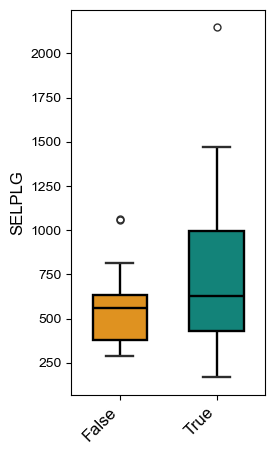

In [147]:
# 바이올린 플롯 그리기
plt.figure(figsize=(2.5, 5))
sns.boxplot(
    data = adata_filtered.obs,
    x = 'gene_group',
    y = 'overall_survival',
    # hue = 'hue',
    linewidth = 1.7,
    flierprops = dict(marker = 'o', markersize = 5),
    palette = ['#ff9800', '#009688'],
    boxprops = dict(edgecolor = 'k'), medianprops = dict(color = 'k'), whiskerprops = dict(color = 'k'),
    gap = 0.3
)

# 그래프 꾸미기
# plt.title(f'{gene_name} expression by cell type', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize = 12)
# plt.legend(title = None, loc = 'upper left')
plt.xlabel('')
plt.ylabel(gene_name, fontsize=12)
# plt.ylim(-1, 7) # SELPLG, VSIR
# plt.ylim(-0.01, 0.08) # IGSF11

plt.show()

C:\Users\heung\AppData\Local\Temp\ipykernel_50960\936698537.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


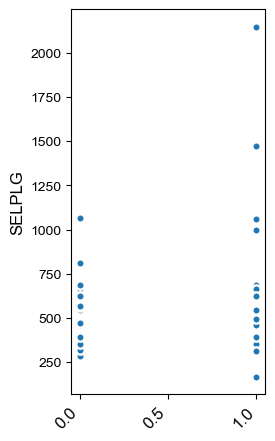

In [151]:
# 바이올린 플롯 그리기
plt.figure(figsize=(2.5, 5))
sns.scatterplot(
    data = adata_filtered.obs,
    x = 'gene_group',
    y = 'overall_survival',
    # hue = 'hue',
    linewidth = 1.7,
    palette = ['#ff9800', '#009688'],
)

# 그래프 꾸미기
# plt.title(f'{gene_name} expression by cell type', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize = 12)
# plt.legend(title = None, loc = 'upper left')
plt.xlabel('')
plt.ylabel(gene_name, fontsize=12)
# plt.ylim(-1, 7) # SELPLG, VSIR
# plt.ylim(-0.01, 0.08) # IGSF11

plt.show()